# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
sns.set_style("darkgrid")

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [2]:
#Считываем наши данные
df = pd.read_csv('data/bank_fin.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
#Расссмотрим столбцы поподробнее
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


Числовых переменных в исходных данных только 6: age, day, duration, campaign, pdays, previous    

In [4]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
missing_values_count = df.isnull().sum()
missing_values_count

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

Видим пропуски в признаке balance 

### Задание 2

In [5]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

Пропущенные значение в поле job обозначены словом unknown

### Задание 3

In [6]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance']

0         2 343,00 $ 
1            45,00 $ 
2         1 270,00 $ 
3         2 476,00 $ 
4           184,00 $ 
             ...     
11157         1,00 $ 
11158       733,00 $ 
11159        29,00 $ 
11160           0  $ 
11161           0  $ 
Name: balance, Length: 11162, dtype: object

In [7]:
# Преобразование в float

# Функция для преобразования строки в float
def convert_balance(value):
    value = str(value).replace(' $', '').replace(' ', '').replace(',', '.')
    return float(value)

In [8]:
# Применяем функцию к столбцу balance
df['balance'] = df['balance'].apply(convert_balance)

In [9]:
# Вычисляем среднее значение и округляем до трех знаков после запятой
print(f'Среднее значение по признаку balance: {round(df.balance.mean(),3)}')

Среднее значение по признаку balance: 1529.129


### Задание 4

In [10]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df['balance'] = df['balance'].fillna(df['balance'].median())
print(f'Среднее значение по признаку balance: {round(df.balance.mean(),3)}')

Среднее значение по признаку balance: 1526.936


In [11]:
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

### Задание 5

In [12]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# Вычисляем моду по признаку job
mode_value = df['job'].mode()[0]

# Заменяем все пропущенные значения в признаке job на модальные.
df['job'] = df['job'].replace('unknown', mode_value)

In [13]:
df['education'].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [14]:
# Вычисляем моду по признаку education
mode_value = df['education'].mode()[0]

# Заменяем все пропущенные значения в признаке education на модальные.
df['education'] = df['education'].replace('unknown', mode_value)

In [15]:
# Проверяем значения признака job
df['job'].value_counts()

job
management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64

In [16]:
# Проверяем значения признака education
df['education'].value_counts()

education
secondary    5973
tertiary     3689
primary      1500
Name: count, dtype: int64

In [17]:
# Получаем самый популярный элемент
most_popular_education = df['education'].value_counts().idxmax()
most_popular_education

'secondary'

In [18]:
# Получаем самый популярный элемент
most_popular_job = df['job'].value_counts().idxmax()
most_popular_job

'management'

In [19]:
mean_price_most_popular_job_and_education = df[ (df['job']==most_popular_job) & (df['education']==most_popular_education) ]['balance'].mean()
print(f'Средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования {round(mean_price_most_popular_job_and_education, 3)}')

Средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования 1598.883


### Задание 6

In [20]:
"""функция принимает на вход DataFrame и признак, по которому ищутся 
выбросы, а затем возвращает потенциальные выбросы, найденные с помощью 
метода Тьюки, и очищенный от них датасет"""

def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    print(f'Нижняя граница по методу Тьюки = {lower_bound}')
    upper_bound = quartile_3 + (iqr * 1.5)
    print(f'Верхняя граница по методу Тьюки = {upper_bound}')
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [21]:
# удалите все выбросы для признака balance

outliers, data = outliers_iqr(df, 'balance')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {data.shape[0]}')

Нижняя граница по методу Тьюки = -2241.0
Верхняя граница по методу Тьюки = 4063.0
Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10105


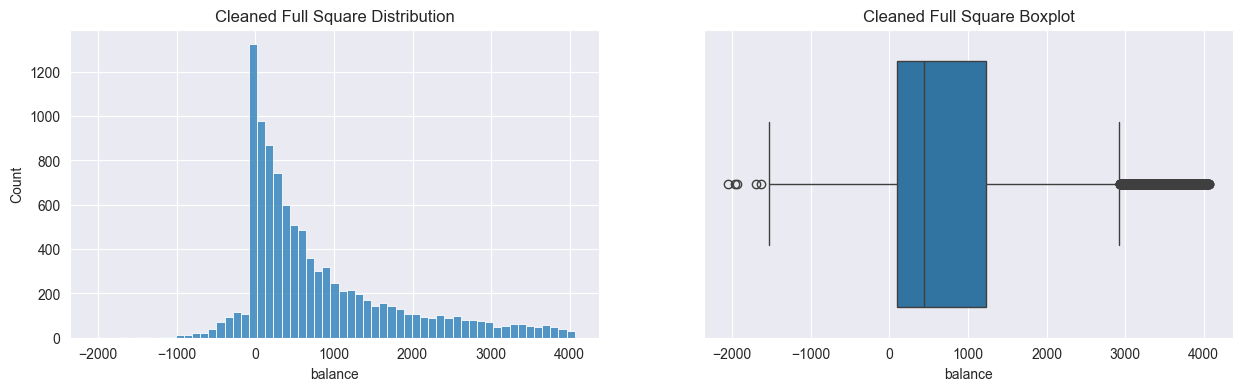

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='balance', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=data, x='balance', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

## Часть 2:  Разведывательный анализ

### Задание 1

deposit
no     5424
yes    4681
Name: count, dtype: int64


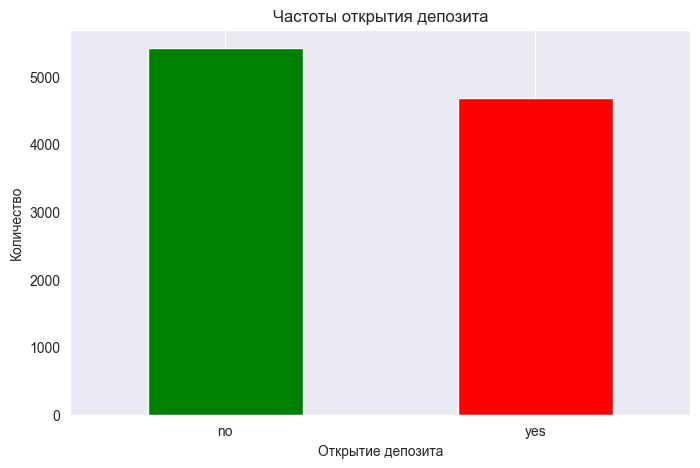

In [23]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
df = pd.DataFrame(data)

# Вычисляем частоты
frequency_counts = df['deposit'].value_counts()

# Выводим частоты
print(frequency_counts)

# Строим диаграмму
plt.figure(figsize=(8, 5))
frequency_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Частоты открытия депозита')
plt.xlabel('Открытие депозита')
plt.ylabel('Количество')
plt.xticks(rotation=0)  # Поворачиваем метки по оси X для удобства чтения
plt.grid(axis='y')  # Добавляем сетку по оси Y
plt.show()


In [24]:
# Оценка сбалансированности

# Вычисляем общее количество
total_count = frequency_counts.sum()

# Вычисляем долю каждой категории
proportions = frequency_counts / total_count

# Выводим результаты
print("Частоты по категориям:")
print(frequency_counts)
print("\nДоли по категориям:")
print(proportions)

# Оценка сбалансированности
if proportions.max() > 0.7:
    print("\nПризнак не сбалансирован.")
else:
    print("\nПризнак сбалансирован.")


Частоты по категориям:
deposit
no     5424
yes    4681
Name: count, dtype: int64

Доли по категориям:
deposit
no     0.536764
yes    0.463236
Name: count, dtype: float64

Признак сбалансирован.


### Задания 2 и 3

In [25]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат

# Описательные статистики для количественных переменных
quantitative_stats = df.describe()

# Выводим результаты
print("Описательные статистики для количественных переменных:")
print(quantitative_stats)

Описательные статистики для количественных переменных:
                age       balance           day      duration      campaign  \
count  10105.000000  10105.000000  10105.000000  10105.000000  10105.000000   
mean      40.895497    807.653538     15.590302    368.742603      2.517170   
std       11.734931    994.151966      8.441510    346.651524      2.707159   
min       18.000000  -2049.000000      1.000000      2.000000      1.000000   
25%       32.000000     95.000000      8.000000    137.000000      1.000000   
50%       38.000000    445.000000     15.000000    252.000000      2.000000   
75%       48.000000   1227.000000     22.000000    490.000000      3.000000   
max       95.000000   4063.000000     31.000000   3881.000000     43.000000   

              pdays      previous  
count  10105.000000  10105.000000  
mean      51.319644      0.816230  
std      109.644179      2.243795  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.0000

In [26]:
def plot_numerical_features_distribution(df, features, target):
    """
    Строит гистограммы и боксплоты для заданных числовых признаков.

    :param df: DataFrame с данными.
    :param features: Список числовых признаков для построения диаграмм.
    """
    numeric_columns = list(df.select_dtypes(include=['number']).columns)
    
    # Проверка на наличие указанных признаков в DataFrame
    for feature in features:
        if feature not in numeric_columns:
            raise ValueError(f"Признак '{feature}' не является числовым или отсутствует в DataFrame.")
    
    n = len(features)  # число числовых признаков
    fig, axes = plt.subplots(n, 2, figsize=(10, 5 * n))  # фигура + n * 2 координатных плоскостей
    
    # Строим в цикле гистограмму и распределение по всем числовым признакам  
    for i, feature in enumerate(features):
        # Строим гистограмму каждой из категорий в данных
        hist = sns.histplot(data=df, x=feature, kde=True, ax=axes[i][0])
        hist.xaxis.set_tick_params(rotation=60)
        axes[i][0].set_title(f'Гистограмма {feature}')
        
        # Посмотрим распределения в зависимости от целевой переменной
        box = sns.boxplot(data=df, x=feature, y=target, hue=target, orient='h', ax=axes[i][1])
        box.xaxis.set_tick_params(rotation=60)
        axes[i][1].set_title(f'Боксплот {feature} по {target}')
    
    plt.tight_layout()  # выравнивание графиков
    plt.show()

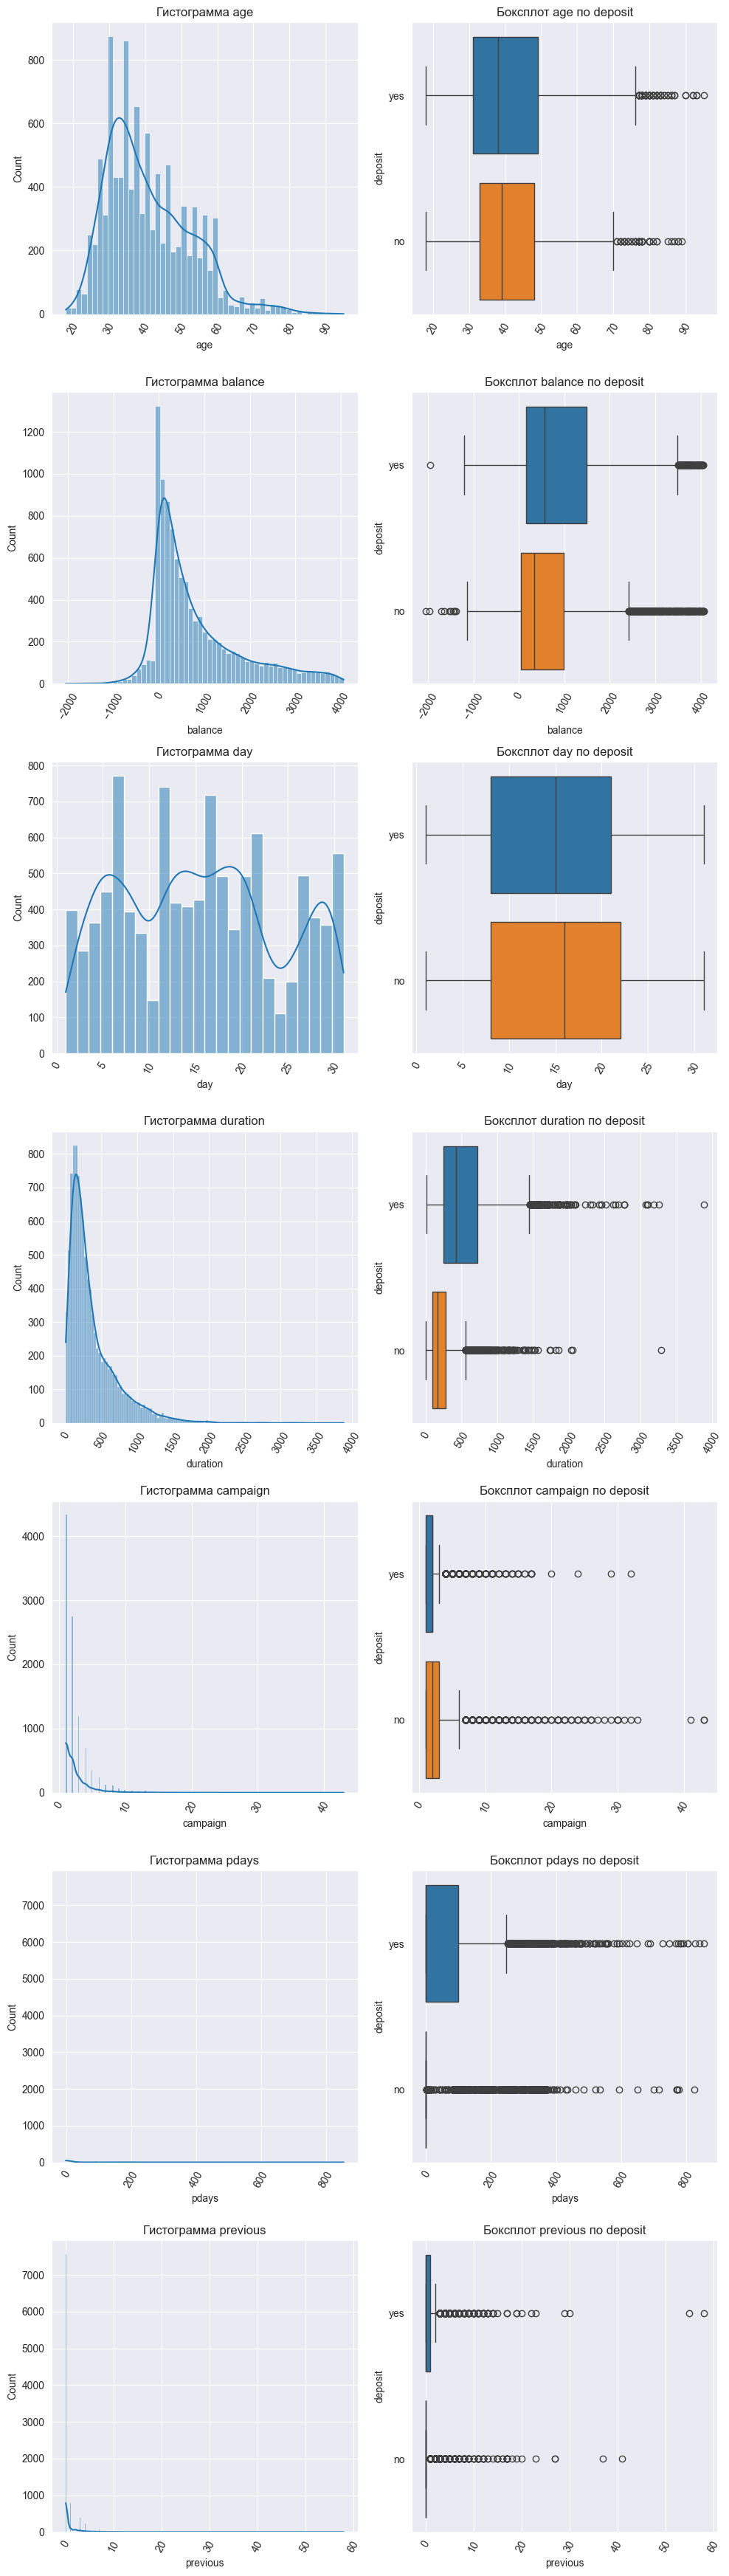

In [27]:
numeric_columns = list(df.select_dtypes(include=['number']).columns)
plot_numerical_features_distribution(df,numeric_columns, 'deposit')

### Задания 4 и 5

In [28]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
# Описательные статистики для категориальных переменных
categorical_stats = df.describe(include=['object'])
print("\nОписательные статистики для категориальных переменных:")
print(categorical_stats)


Описательные статистики для категориальных переменных:
               job  marital  education default housing   loan   contact  \
count        10105    10105      10105   10105   10105  10105     10105   
unique          11        3          3       2       2      2         3   
top     management  married  secondary      no      no     no  cellular   
freq          2315     5715       5517    9939    5243   8712      7283   

        month poutcome deposit  
count   10105    10105   10105  
unique     12        4       2  
top       may  unknown      no  
freq     2617     7570    5424  


In [29]:
def plot_categorical_features_distribution(df, features, target):
    """
    Строит столбчатые диаграммы для заданных категориальных признаков.

    :param df: DataFrame с данными.
    :param features: Список категориальных признаков для построения диаграмм.
    """
    n = len(features)  # число категориальных признаков
    fig, axes = plt.subplots(n, 2, figsize=(10, 5 * n))  # фигура + n * 2 координатных плоскостей
    
    for i, feature in enumerate(features):
        # Строим количественную столбчатую диаграмму для долевого соотношения каждой из категорий в данных
        count_data = (df[feature].value_counts(normalize=True)
                      .sort_values(ascending=False)
                      .rename('percentage')
                      .reset_index())
        count_data.columns = [feature, 'percentage']  # Переименовываем колонки для ясности
        
        count_barplot = sns.barplot(data=count_data, x=feature, hue=feature, y='percentage', ax=axes[i][0])
        count_barplot.xaxis.set_tick_params(rotation=60)
        axes[i][0].set_title(f'Доля по категориям: {feature}')
        
        # Строим столбчатую диаграмму доли людей открывших депозит в зависимости от категории
        mean_barplot = sns.barplot(data=df, y=target, x=feature, hue=feature,  ax=axes[i][1])
        mean_barplot.xaxis.set_tick_params(rotation=60)
        axes[i][1].set_title(f'Доля открывших депозит по {feature}')
    
    plt.tight_layout()  # выравнивание графиков
    plt.show()

In [30]:
df['deposit_num']=df['deposit'].replace({'yes': 1, 'no': 0})

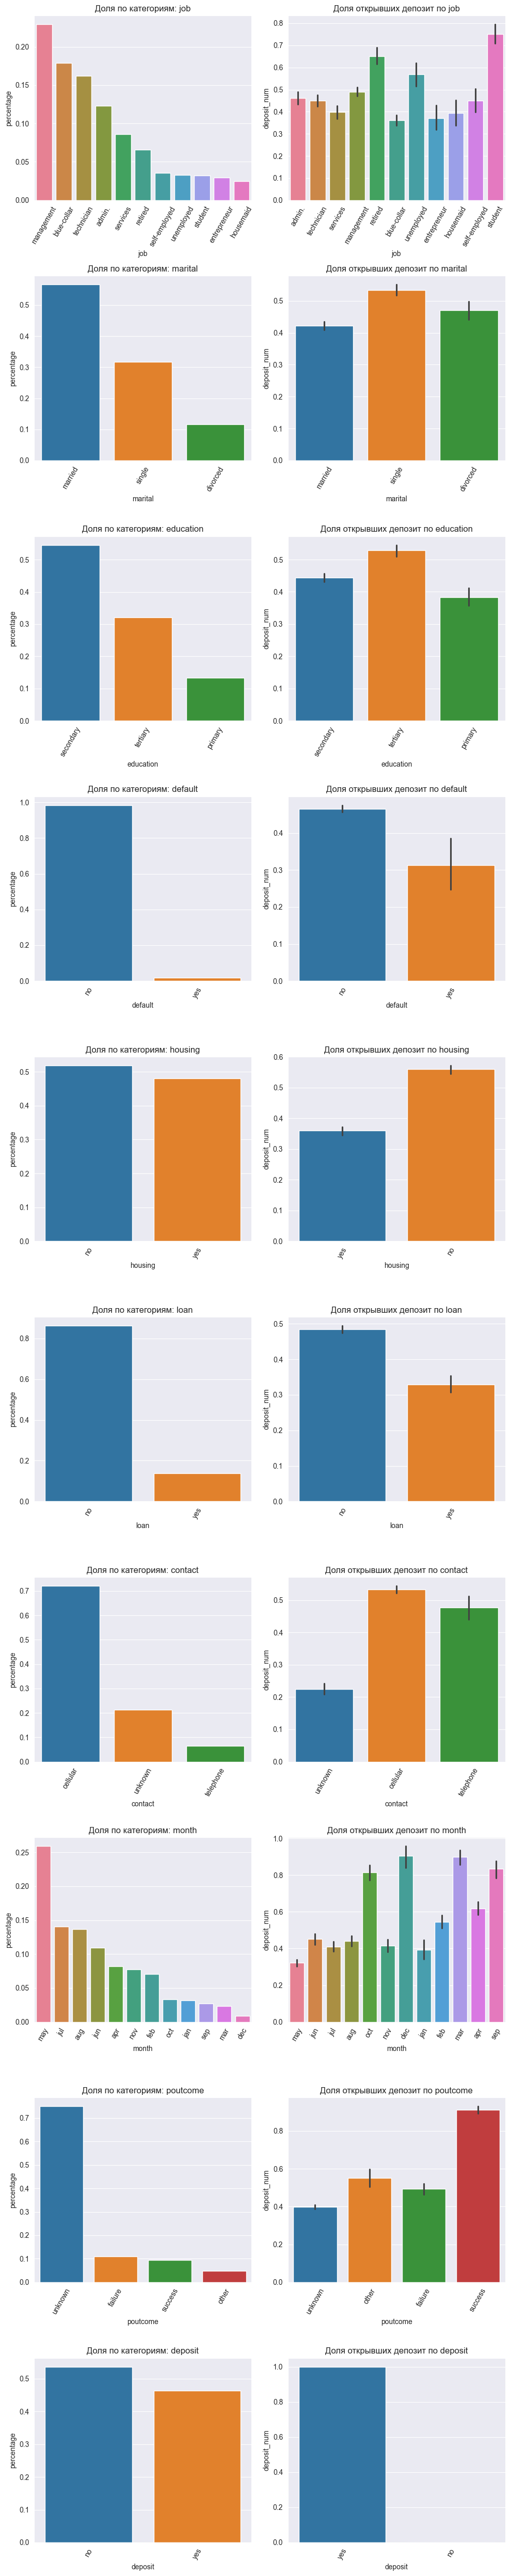

In [31]:
non_numeric_columns = list(df.select_dtypes(exclude=['number']))
plot_categorical_features_distribution(df, non_numeric_columns, 'deposit_num')

### Задание 6

In [32]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# Подсчет успехов и неудач по статусу предыдущей кампании
summary = df.groupby('poutcome')['deposit'].value_counts().unstack()

# Вычисляем соотношение успехов к неудачам
summary['ratio'] = summary['yes'] / summary['no']

# Определяем статус с наибольшим количеством успехов
successful_status = summary[summary['yes'] > summary['no']]

print("Статусы предыдущих кампаний с большим количеством успехов:")
print(successful_status)

Статусы предыдущих кампаний с большим количеством успехов:
deposit    no  yes      ratio
poutcome                     
other     216  265   1.226852
success    84  861  10.250000


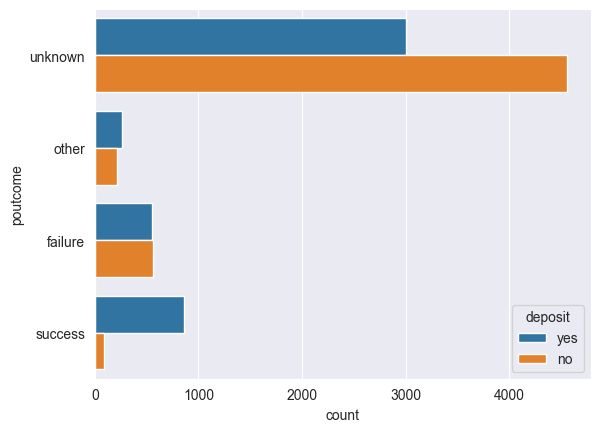

In [33]:
sns.countplot(data=df, y='poutcome', hue='deposit');

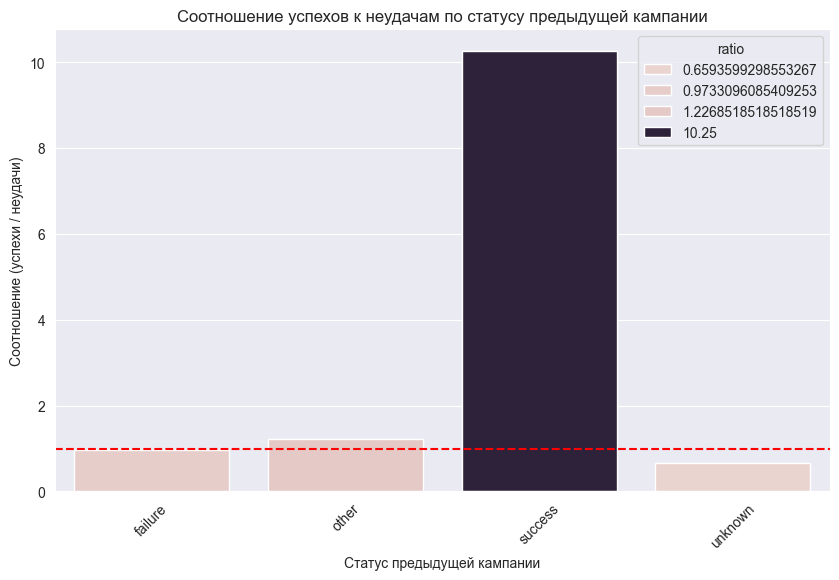

In [34]:
# Построение диаграммы соотношения успехов к неудачам
plt.figure(figsize=(10, 6))
sns.barplot(x=summary.index, y='ratio', hue='ratio', data=summary.reset_index())
plt.title('Соотношение успехов к неудачам по статусу предыдущей кампании')
plt.ylabel('Соотношение (успехи / неудачи)')
plt.xlabel('Статус предыдущей кампании')
plt.xticks(rotation=45)
plt.axhline(1, color='red', linestyle='--')  # Линия для обозначения равного соотношения
plt.show()

Для статуса "success" предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач

### Задание 7

In [35]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# Подсчет успехов и неудач по месяцам
summary = df.groupby('month')['deposit'].value_counts().unstack(fill_value=0)

# Вычисляем процент неудач для каждого месяца
summary['total'] = summary['yes'] + summary['no']
summary['failure_rate'] = summary['no'] / summary['total'] * 100

# Находим месяц с наибольшим процентом неудач
max_failure_month = summary['failure_rate'].idxmax()
max_failure_rate = summary['failure_rate'].max()

print(f"Месяц с наибольшим процентом неудач: {max_failure_month} ({max_failure_rate:.2f}%)")

Месяц с наибольшим процентом неудач: may (67.86%)


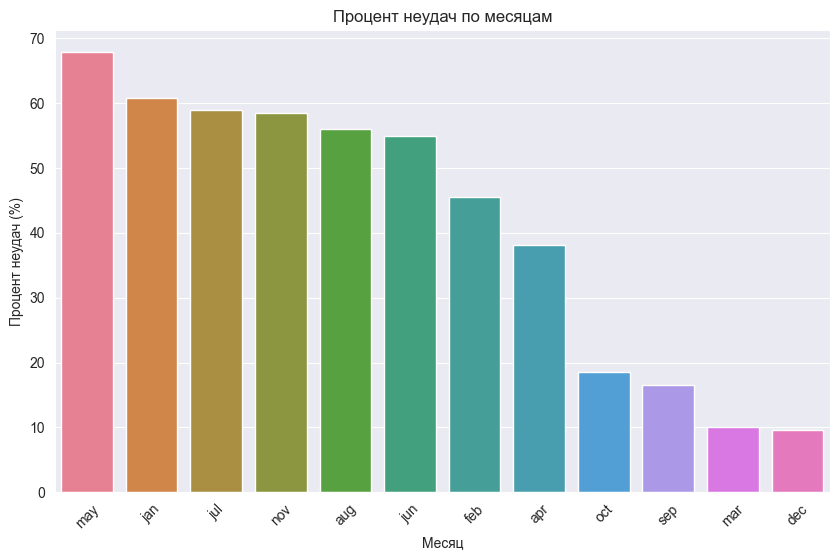

In [36]:
# Сортировка по проценту неудач в порядке убывания
summary_sorted = summary.sort_values(by='failure_rate', ascending=False)

# Построение диаграммы процента неудач по месяцам
plt.figure(figsize=(10, 6))
sns.barplot(x=summary_sorted.index, y='failure_rate', hue=summary_sorted.index, data=summary_sorted)
plt.title('Процент неудач по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Процент неудач (%)')
plt.xticks(rotation=45)
plt.show()

Самый неподходящий месяц для маркетинговой компании, это май. Скорее всего это связано с праздниками и тем, что многие уезжают в отпус и не склонны к открытию депозитов в это время. Аналогично и в январе, а также в летние месяцы.

Наиболее подходящий месяц для маркетинговых компаний, это месяй декабрь. Скорее всего это связано с получением годовых премий и потребностью вложения этих средств.

### Задание 8

In [37]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

def get_age_cat(value):
  if value<30:
    return '<30'
  if value>=30 and value<40:
    return '30-40'
  if value>=40 and value<50:
    return '40-50'
  if value>=50 and value<60:
    return '50-60'
  if value>=60:
    return '60+'

In [38]:
df['age_cat'] = df['age'].apply(get_age_cat)

In [39]:
def plot_success_failure_ratio(df, group_by_feature, group_by_feature_name, target_feature):
    """
    Строит столбчатую диаграмму процента успехов по заданному признаку.

    :param df: DataFrame с данными.
    :param group_by_feature: Признак для группировки (например, 'age_cat').
    :param group_by_feature_name: Название признака для отображения на графике.
    :param target_feature: Целевой признак (например, 'deposit').
    """
    # Подсчет успехов и неудач по заданному признаку
    summary = df.groupby(group_by_feature)[target_feature].value_counts().unstack(fill_value=0)

    # Вычисление общего числа записей в каждой группе
    summary['total'] = summary['yes'] + summary['no']

    # Вычисление процента успехов
    summary['success_rate'] = (summary['yes'] / summary['total']) * 100  # Процент успехов

    # Сортировка по проценту успехов в порядке убывания
    summary = summary.sort_values(by='success_rate', ascending=False)
    print(summary)

   # Построение диаграммы только для success_rate
    plt.figure(figsize=(10, 6))
    
    # Создание столбчатой диаграммы с разными цветами для каждой группы
    bars = plt.bar(summary.index, summary['success_rate'], color=sns.color_palette("Set2", len(summary)))

    plt.title(f'Процент открытых депозитов по признаку {group_by_feature_name}')
    plt.xlabel(group_by_feature_name)
    plt.ylabel('Процент успехов (%)')
    plt.xticks(rotation=45)
    
    # Добавление легенды
    plt.axhline(0, color='red', linestyle='--')  # Линия для обозначения нуля
    plt.show()

deposit    no   yes  total  success_rate
age_cat                                 
60+       157   496    653     75.957121
<30       594   861   1455     59.175258
30-40    2245  1716   3961     43.322393
50-60     984   670   1654     40.507860
40-50    1444   938   2382     39.378673


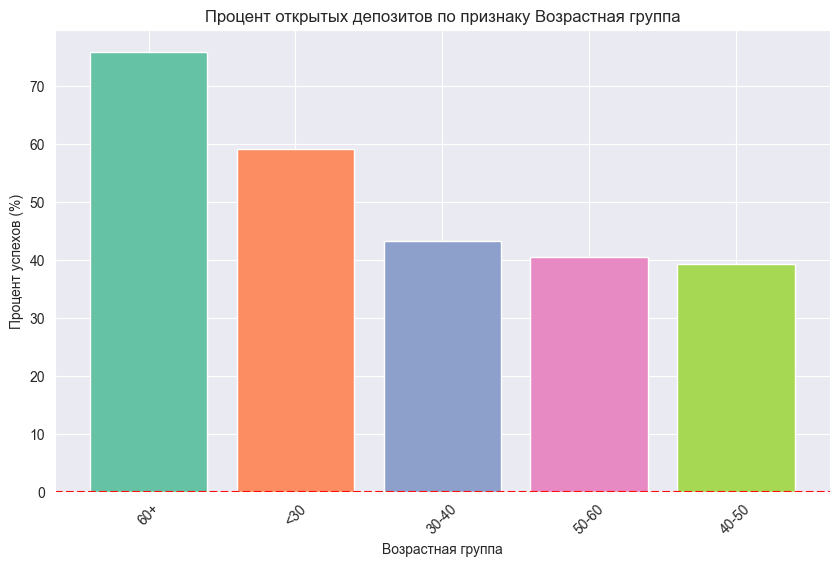

In [40]:
# Построение визуализации
plot_success_failure_ratio(df, group_by_feature='age_cat', group_by_feature_name='Возрастная группа', target_feature='deposit')

Количество открытых депозитов преобладает в категории "30-40". Скорее всего в этом возрасте клиенты имеют стабильный доход и у них есть возможности это сделать

Соотношение открытых депозитов после маркетинговой компании преобладает в категории "60+". Тут можно преположить, что возможно в этом возрасте клиенты больше заботятся о сохранении средств. Категория "<30" также склонна соглашаться на открытие депозита. Возможно в этом возрасте требуется накопление средств для для дальнейшей покупке чего-либо.


### Задания 9 и 10

deposit     no   yes  total  success_rate
marital                                  
single    1497  1716   3213     53.408030
divorced   624   553   1177     46.983857
married   3303  2412   5715     42.204724


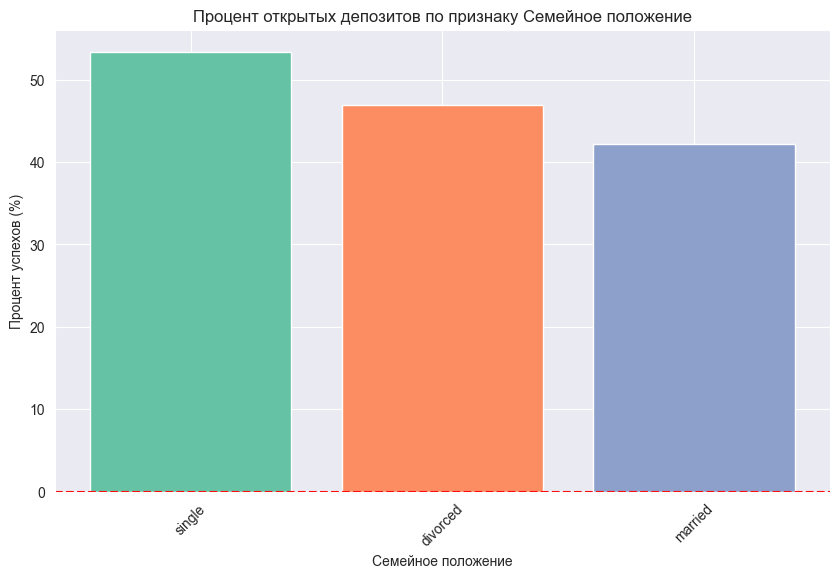

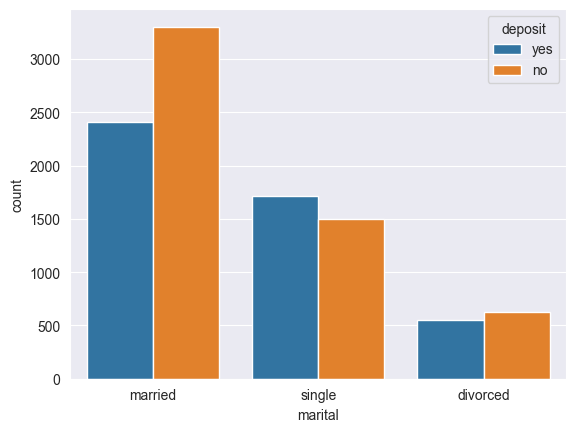

In [41]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
plot_success_failure_ratio(df, group_by_feature='marital', group_by_feature_name='Семейное положение', target_feature='deposit')
sns.countplot(data=df, x='marital', hue='deposit', order=df['marital'].value_counts().index );

Клиенты, которые не были в браке, соглашаются на открытие депозита больше, чем остальные категории, но при этом наибольшую категорию клиентов составляют клиенты в браке

deposit      no   yes  total  success_rate
education                                 
tertiary   1526  1713   3239     52.886693
secondary  3066  2451   5517     44.426319
primary     832   517   1349     38.324685


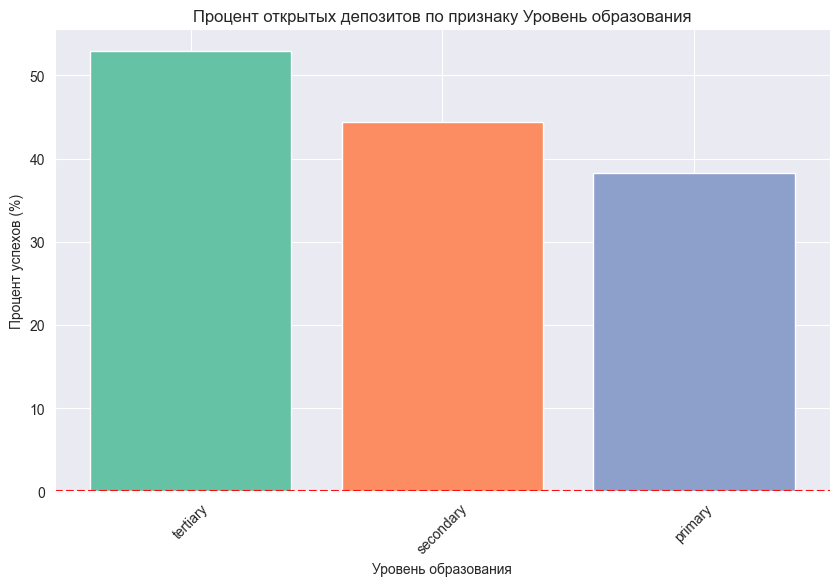

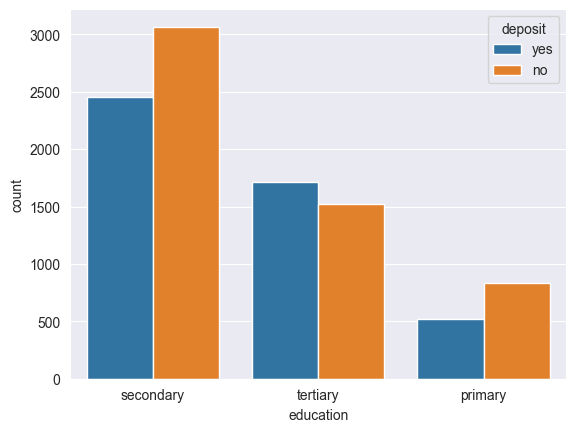

In [42]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
plot_success_failure_ratio(df, group_by_feature='education', group_by_feature_name='Уровень образования', target_feature='deposit')
sns.countplot(data=df, x='education', hue='deposit', order=df['education'].value_counts().index);

Клиенты с высшим образованием соглашаются на открытие депозита в большем соотношении, чем остальные категории, но при этом наибольшую категорию клиентов составляют клиенты с среднем уровнем образования

deposit          no   yes  total  success_rate
job                                           
student          81   245    326     75.153374
retired         231   432    663     65.158371
unemployed      143   189    332     56.927711
management     1180  1135   2315     49.028078
admin.          672   574   1246     46.067416
technician      900   738   1638     45.054945
self-employed   197   161    358     44.972067
services        523   345    868     39.746544
housemaid       153    99    252     39.285714
entrepreneur    189   111    300     37.000000
blue-collar    1155   652   1807     36.081904


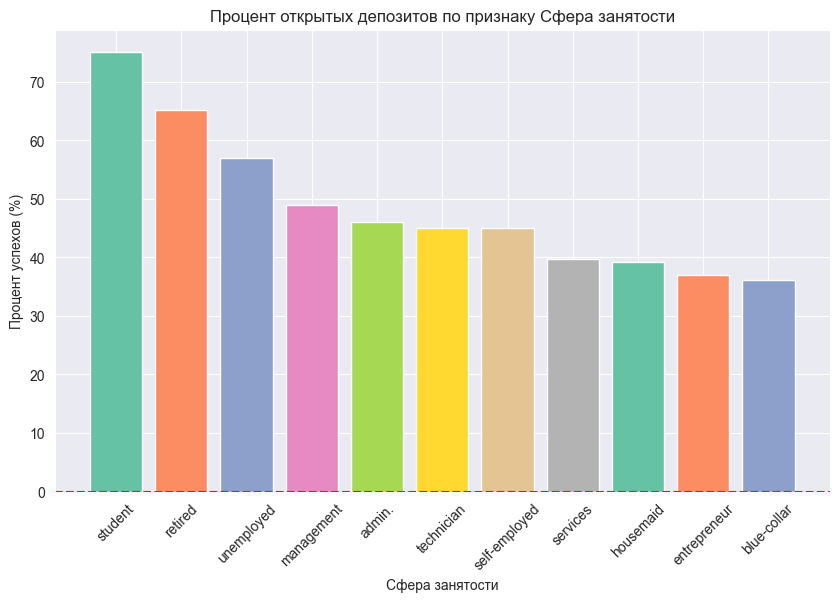

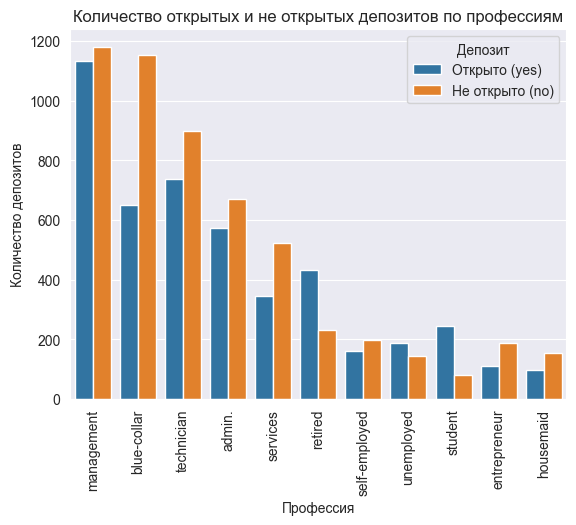

In [43]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
plot_success_failure_ratio(df, group_by_feature='job', group_by_feature_name='Cфера занятости', target_feature='deposit')
sns.countplot(data=df, x='job', hue='deposit', order=df['job'].value_counts().index)
plt.title('Количество открытых и не открытых депозитов по профессиям')
plt.xlabel('Профессия')
plt.ylabel('Количество депозитов')
plt.xticks(rotation=90)  # Поворот меток по оси X на 90 градусов
plt.legend(title='Депозит', labels=['Открыто (yes)', 'Не открыто (no)'])
plt.show()

Студенты и пенсионеры чаше соглашаются открыть депозить, но большую по числености категорию составляют управленцы и синии воротнички. 

### Задание 11

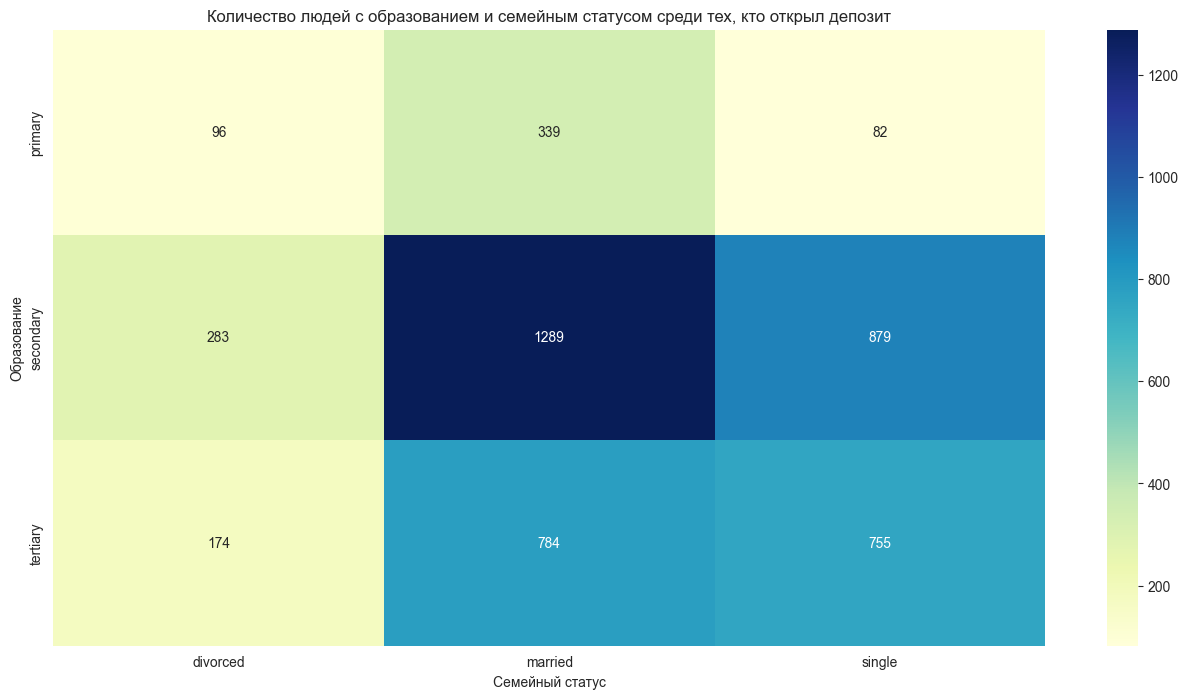

In [44]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
# Создание сводной таблицы для людей, открывших депозит
pivot_table = pd.pivot_table(
    data=df[df['deposit'] == 'yes'],
    values='deposit',
    index='education',
    columns='marital',
    aggfunc='count'
)

# Настройка графика
fig, ax = plt.subplots(figsize=(16, 8))

# Построение тепловой карты
heatmap = sns.heatmap(pivot_table, annot=True, fmt='g', ax=ax, cmap='YlGnBu')
plt.title('Количество людей с образованием и семейным статусом среди тех, кто открыл депозит')
plt.xlabel('Семейный статус')
plt.ylabel('Образование')
plt.show()

Наиболее многочисленны в части тех, кто открыл депозит, клиенты в браке со среднем образованием

## Часть 3: преобразование данных

### Задание 1

In [45]:
# преобразуйте уровни образования
LE=LabelEncoder()
df['education'] = LE.fit_transform(df['education'])

In [46]:
sum = df['education'].sum()
print(f'Сумма получившихся значений для признака education: {sum}')

Сумма получившихся значений для признака education: 11995


In [47]:
df['age_cat'] = LE.fit_transform(df['age_cat'])

### Задания 2 и 3

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10105 entries, 0 to 11161
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          10105 non-null  int64  
 1   job          10105 non-null  object 
 2   marital      10105 non-null  object 
 3   education    10105 non-null  int64  
 4   default      10105 non-null  object 
 5   balance      10105 non-null  float64
 6   housing      10105 non-null  object 
 7   loan         10105 non-null  object 
 8   contact      10105 non-null  object 
 9   day          10105 non-null  int64  
 10  month        10105 non-null  object 
 11  duration     10105 non-null  int64  
 12  campaign     10105 non-null  int64  
 13  pdays        10105 non-null  int64  
 14  previous     10105 non-null  int64  
 15  poutcome     10105 non-null  object 
 16  deposit      10105 non-null  object 
 17  deposit_num  10105 non-null  int64  
 18  age_cat      10105 non-null  int64  
dtypes: float6

In [49]:
# преобразуйте бинарные переменные в представление из нулей и единиц
# Т.к. ранее уже было преобразование, то просто скопируем значения из df['deposit_num'] и удалим этот признак
df['deposit'] = df['deposit_num']
df = df.drop(['deposit_num'], axis=1)

In [50]:
# Стандартное отклонение по преобразованной в корректный вид целевой переменной deposit
std = round(df['deposit'].std(),3)
print(f'Стандартное отклонение: {std}')

Стандартное отклонение: 0.499


In [51]:
df['default']=df['default'].replace({'yes': 1, 'no': 0})
df['housing']=df['housing'].replace({'yes': 1, 'no': 0})
df['loan']=df['loan'].replace({'yes': 1, 'no': 0})

In [52]:
# Вычислите среднее арифметическое для каждой из получившихся переменных, сложите три результата 
# и в качестве ответа впишите итог, округлив его до трёх знаков после точки-разделителя.
mean_sum = round(df['default'].mean() + df['housing'].mean() + df['loan'].mean(),3)
print(f'Сумма средних: {mean_sum}')

Сумма средних: 0.635


### Задание 4

In [53]:
# создайте дамми-переменные
df = pd.get_dummies(df)
df.shape

(10105, 46)

### Задания 5 и 6

<Axes: >

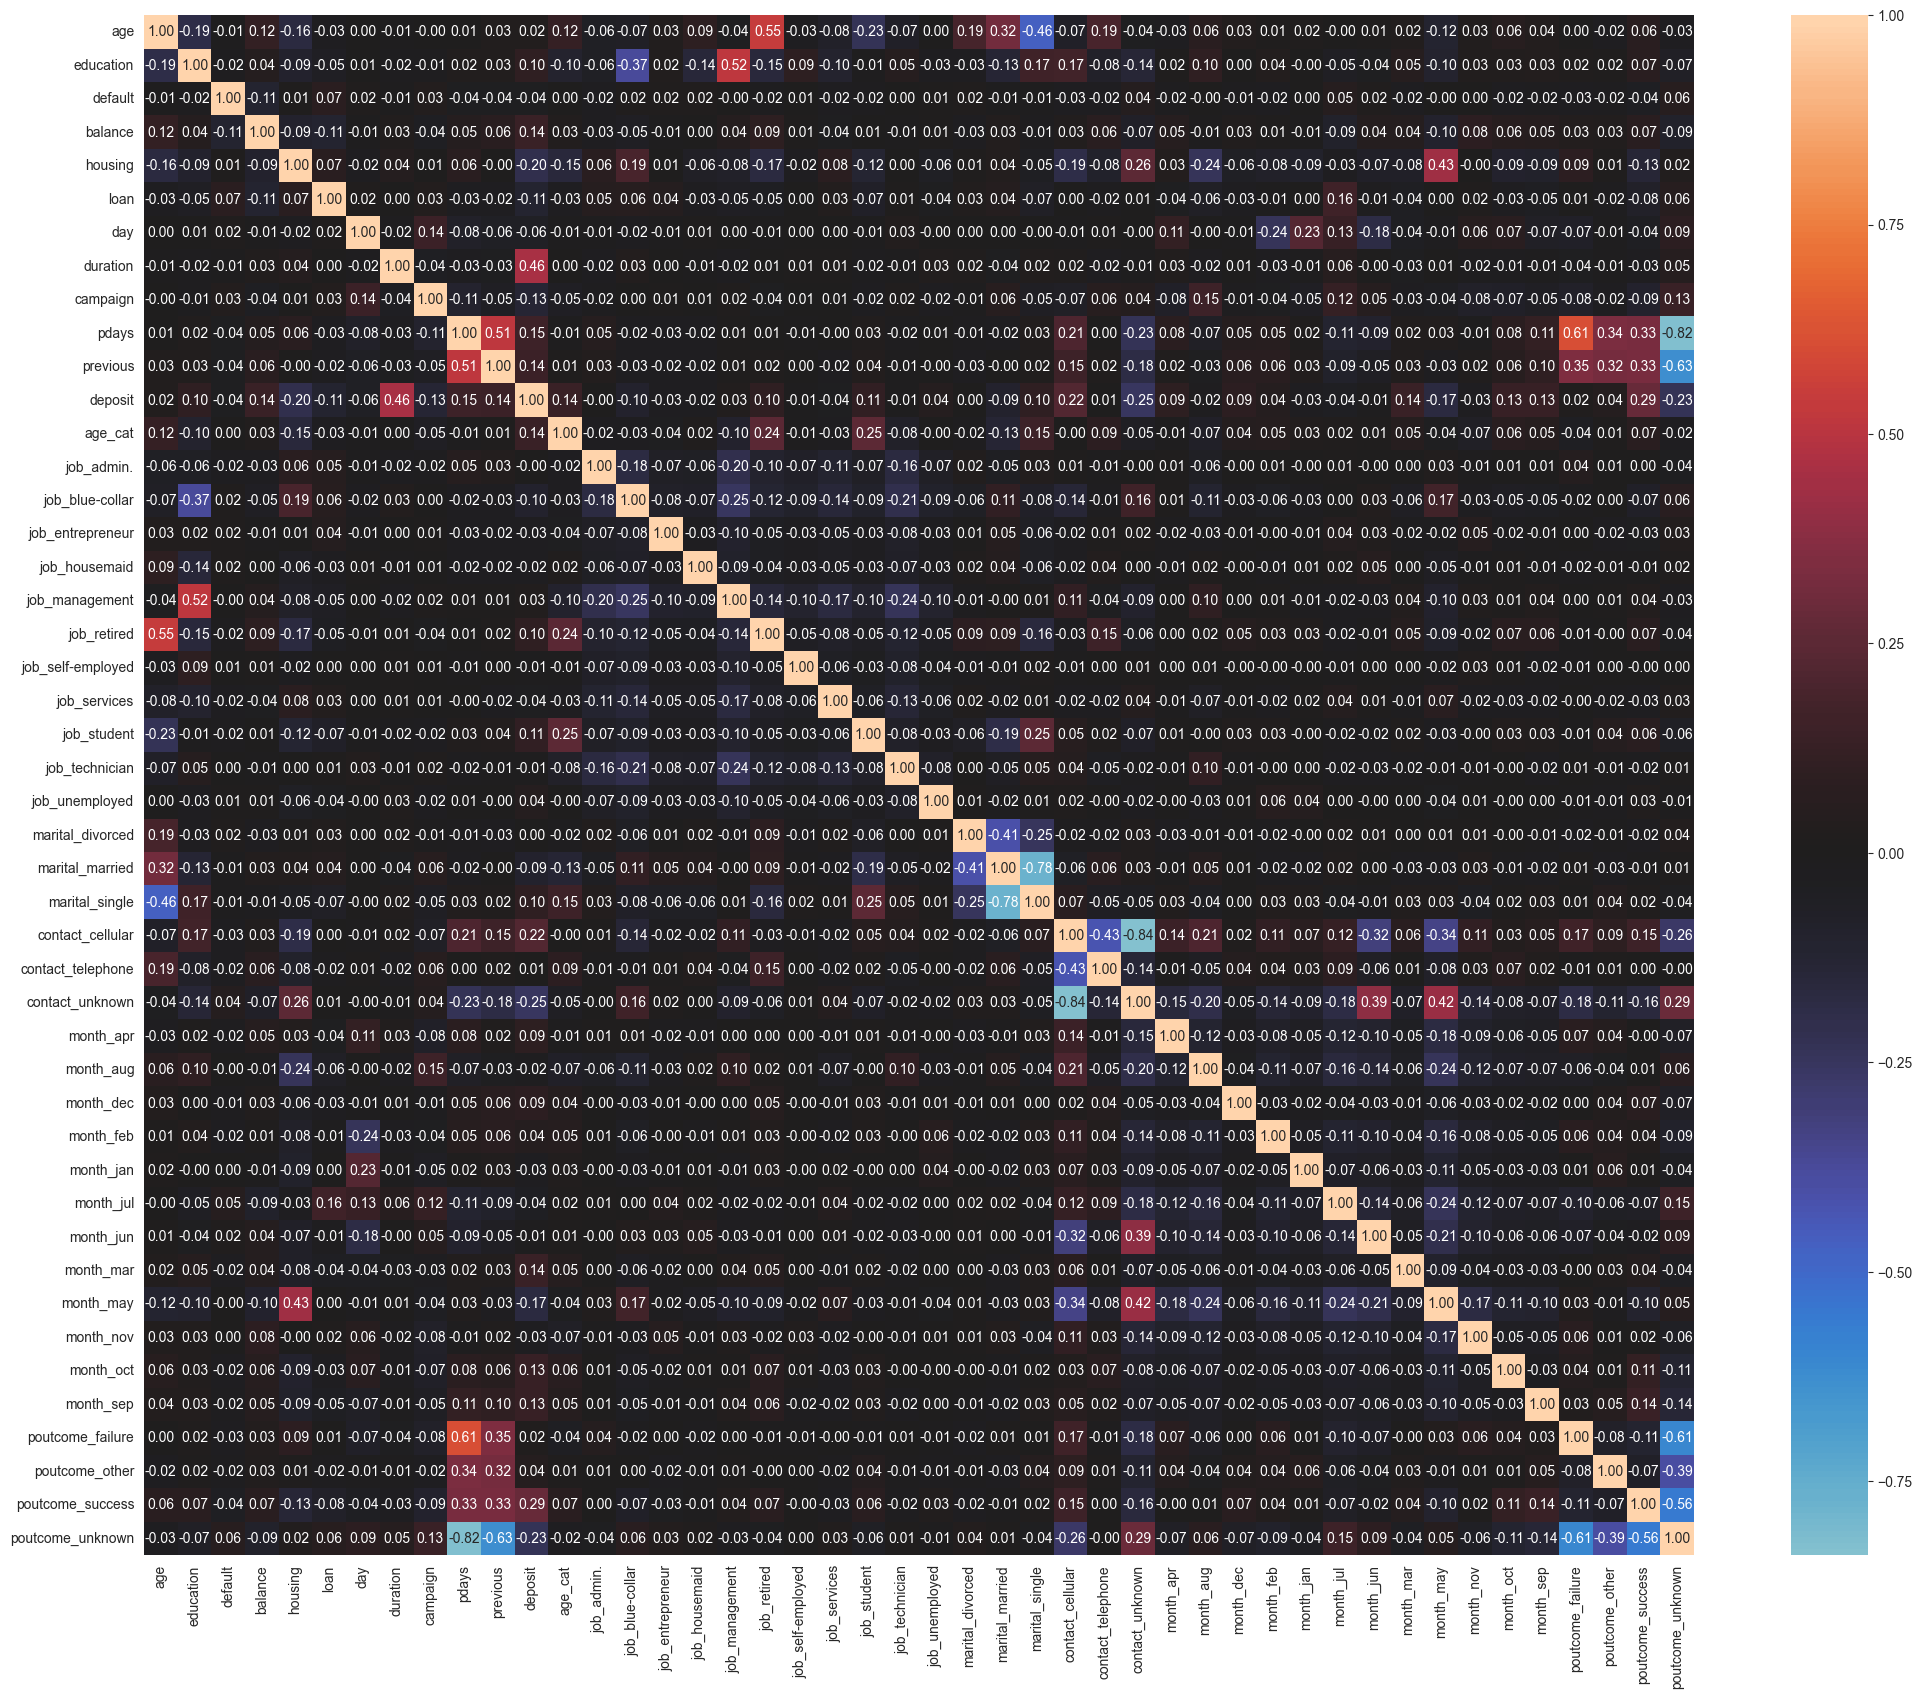

In [54]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
plt.figure(figsize=(25,20))  
sns.heatmap(df.corr(),fmt='.2f',annot=True, center=0)

In [55]:
def find_high_correlation_pairs(df, threshold=0.9):
    """
    Находит пары признаков с корреляцией выше заданного порога.

    :param df: DataFrame с данными.
    :param threshold: Порог корреляции для определения мультиколлинеарности.
    :return: Список пар признаков с высокой корреляцией.
    """
    # Вычисление матрицы корреляции
    corr_matrix = df.corr()
    
    pairs = []
    
    # Проход по всем парам признаков
    for i in corr_matrix.columns:
        for j in corr_matrix.columns:
            if i != j and abs(corr_matrix[i][j]) >= threshold:
                pairs.append((i, j))
    
    # Удаление дубликатов (например, (A, B) и (B, A))
    unique_pairs = set(tuple(sorted(pair)) for pair in pairs)
    
    return list(unique_pairs)

In [56]:
# Находим пары признаков с высокой корреляцией
result_pairs = find_high_correlation_pairs(df, threshold=0.8)
print(result_pairs)

[('contact_cellular', 'contact_unknown'), ('pdays', 'poutcome_unknown')]


In [57]:
display(df['contact_cellular'].value_counts()[:3])
display(df['contact_unknown'].value_counts()[:3])
display(df['pdays'].value_counts()[:3])
display(df['poutcome_unknown'].value_counts()[:3])

contact_cellular
True     7283
False    2822
Name: count, dtype: int64

contact_unknown
False    7944
True     2161
Name: count, dtype: int64

pdays
-1      7568
 92       88
 182      77
Name: count, dtype: int64

poutcome_unknown
True     7570
False    2535
Name: count, dtype: int64

Большой коэффициент корреляции обусловлен тем, что совпадает признаки показывают одно и тоже, так например, при неизвестном результате маркетинговой компании неизвестно количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании.
Аналогично и обратная связь типа контакта неизвестного и типа контакта с известным мобильным телефоном.

In [58]:
from scipy.stats import pointbiserialr
def plot_feature_correlations(df, target_feature):
    """
    Строит столбчатую диаграмму степени корреляции признаков с целевой переменной.

    :param df: DataFrame с данными.
    :param target_feature: Название целевого признака.
    """
    # Создание словаря для хранения значений корреляции
    corr_with_target = {}

    # Рассчитываем корреляцию всех признаков с целевой переменной
    for column in df.columns:
        if column != target_feature:
            corr_with_target[column] = pointbiserialr(df[target_feature], df[column]).correlation

    # Сортируем значения корреляции в порядке убывания
    sorted_corr_with_target = {k: v for k, v in sorted(corr_with_target.items(), key=lambda item: abs(item[1]), reverse=True)}

    # Получаем имена признаков и их корреляции
    feature_names = list(sorted_corr_with_target.keys())
    correlation_values = list(sorted_corr_with_target.values())

    # Построение диаграммы
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_names, y=correlation_values, palette='viridis')
    plt.title(f'Степень корреляции признаков с целевой переменной "{target_feature}"')
    plt.xlabel('Признаки')
    plt.ylabel('Коэффициент корреляции')
    plt.xticks(rotation=45)
    plt.show()

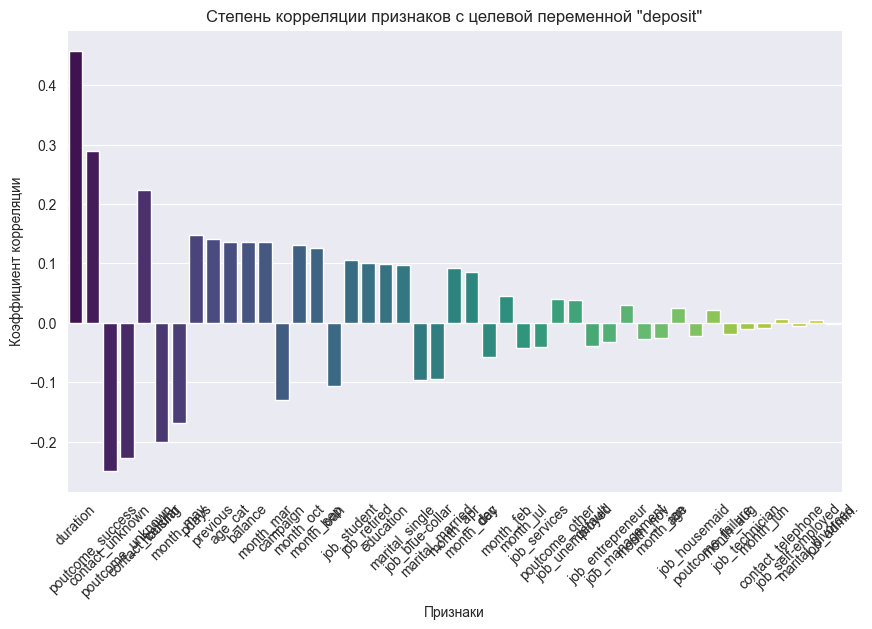

In [59]:
# Строим диаграмму, отображающую признаки, в наибольшей степени коррелирующие с целевой переменной 'deposit'
plot_feature_correlations(df, target_feature='deposit')

### Задания 7 и 8

In [60]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [61]:
# рассчитайте необходимые показатели
X_test_len = len(X_test)
print(f'Размер тестовой выборки: {X_test_len}')

Размер тестовой выборки: 3335


In [62]:
mean_deposit = round(y_test.mean(),2)
print(f'Среднее значение целевой переменной на тестовой выборке {mean_deposit}')

Среднее значение целевой переменной на тестовой выборке 0.46


### Задание 9

In [63]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
# Отбор лучших признаков
selector = SelectKBest(score_func=f_classif, k=15) 
selector.fit(X_train, y_train) 
# Получение имен отобранных признаков
selected_features = X_train.columns[selector.get_support()]

print("Отобранные признаки:", selected_features)


Отобранные признаки: Index(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_cat', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [64]:
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

### Задание 10

In [65]:
# нормализуйте данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
mean_test_1_predicat = X_test_scaled[:, 0].mean().round(2)
print(f'Среднее арифметическое для первого предиктора: {mean_test_1_predicat}')

Среднее арифметическое для первого предиктора: 0.47


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [67]:
# обучите логистическую регрессию и рассчитайте метрики качества
#Создаём объект класса LogisticRegression
model = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42, 
    max_iter=1000 )

model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [68]:
#Делаем предсказание для тестовой выборки
y_test_pred = model.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.73      0.78      1545

    accuracy                           0.80      3335
   macro avg       0.81      0.80      0.80      3335
weighted avg       0.81      0.80      0.80      3335



### Задания 2,3,4

In [69]:
# обучите решающие деревья, настройте максимальную глубину
#Создаем объект класса дерево решений
model = tree.DecisionTreeClassifier(
    criterion='entropy',
    # min_samples_leaf=5,
    # max_depth=8,
    random_state=42
)
#Обучаем дерево по алгоритму CART
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [70]:
#Делаем предсказание для тренировочной выборки
y_train_pred = model.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))

#Делаем предсказание для тестовой выборки
y_test_pred = model.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       1.00      1.00      1.00      3136

    accuracy                           1.00      6770
   macro avg       1.00      1.00      1.00      6770
weighted avg       1.00      1.00      1.00      6770

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1790
           1       0.74      0.71      0.72      1545

    accuracy                           0.75      3335
   macro avg       0.75      0.74      0.75      3335
weighted avg       0.75      0.75      0.75      3335



### Задание 5

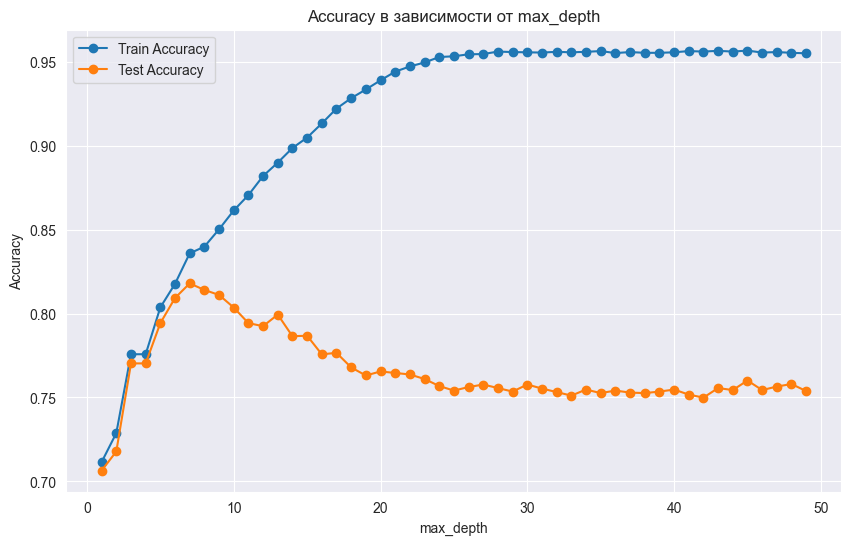

In [71]:
# Определение параметров для перебора
min_samples_leaf_options = 2
max_depth_options = range(1,50)
criterion_options = 'entropy'

train_scores = []
test_scores = []

# Перебор всех комбинаций параметров
for max_depth in max_depth_options:
    # Создание и обучение модели
    model = tree.DecisionTreeClassifier(
        min_samples_leaf=min_samples_leaf_options,
        max_depth=max_depth,
        criterion=criterion_options
    )
    model.fit(X_train_scaled, y_train)
    
    # Оценка модели на обучающей выборке
    train_score = model.score(X_train_scaled, y_train)
    train_scores.append(train_score)
    
    # Оценка модели на тестовой выборке
    test_score = model.score(X_test_scaled, y_test)
    test_scores.append(test_score)

# Построение диаграммы
plt.figure(figsize=(10, 6))
plt.plot(max_depth_options, train_scores, label='Train Accuracy', marker='o')
plt.plot(max_depth_options, test_scores, label='Test Accuracy', marker='o')
plt.title('Accuracy в зависимости от max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
from sklearn.model_selection import GridSearchCV

# подберите оптимальные параметры с помощью gridsearch
parameters = {'min_samples_leaf': [2, 5, 7, 10],
              'max_depth': [3,5,7],
              'criterion':['entropy']
              }

model = GridSearchCV(tree.DecisionTreeClassifier(), 
                        parameters,
                        cv=3, scoring='accuracy', 
                        return_train_score=True)

%time model.fit(X_train_scaled, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(model.best_params_))

CPU times: total: 578 ms
Wall time: 565 ms
accuracy на тестовом наборе: 0.82
f1_score на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [93]:
# Импортируем необходимые библиотеки
from sklearn import ensemble

# Создаем экземпляр классификатора случайного леса
model = ensemble.RandomForestClassifier(
    n_estimators=100,        # Количество деревьев в лесу (100 деревьев)
    criterion='gini',        # Критерий для оценки качества разбиения (используем индекс Джини)
    min_samples_leaf=5,      # Минимальное количество образцов в листе (не менее 5)
    max_depth=10,            # Максимальная глубина дерева (ограничиваем до 10 уровней)
    random_state=42          # Устанавливаем фиксированное значение для воспроизводимости результатов
)

# Обучаем модель на обучающем наборе данных
model.fit(X_train_scaled, y_train)  # X_train_scaled - обучающие данные, y_train - метки классов

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [95]:
from sklearn.metrics import accuracy_score, recall_score

#Делаем предсказание для тестовой выборки
y_pred = model.predict(X_test_scaled)

#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1790
           1       0.79      0.82      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задания 2 и 3

In [120]:
# Используем для классификации градиентный бустинг и сравниваем качество со случайным лесом
gb_model = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,      # Устанавливаем скорость обучения (0.05), контролирующую, как быстро модель обучается
    n_estimators=300,        # Указываем количество деревьев в модели (300 деревьев)
    min_samples_leaf=5,      # Минимальное количество образцов в листе (не менее 5)
    max_depth=5,             # Максимальная глубина каждого дерева (ограничиваем до 5 уровней)
    random_state=42          # Устанавливаем фиксированное значение для воспроизводимости результатов
)

# Обучаем модель на обучающем наборе данных
gb_model.fit(X_train_scaled, y_train)  # X_train_scaled - обучающие данные, y_train - метки классов

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=5,
                           n_estimators=300, random_state=42)

In [121]:
#Делаем предсказание для тестовой выборки
y_pred = gb_model.predict(X_test_scaled)

#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1790
           1       0.79      0.82      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 4

In [103]:
# Объединяем уже известные вам алгоритмы с помощью стекинга
estimators = [
    # Добавляем классификатор дерева решений
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',      # Критерий для оценки качества разбиения (используем энтропию)
        min_samples_leaf=5,       # Минимальное количество образцов в листе (не менее 5)
        max_depth=6,              # Максимальная глубина дерева (ограничиваем до 6 уровней)
        random_state=42           # Устанавливаем фиксированное значение для воспроизводимости результатов
    )),
    
    # Добавляем логистическую регрессию
    ('log_reg', linear_model.LogisticRegression(
        solver='sag',             # Метод оптимизации (используем Stochastic Average Gradient)
        random_state=42           # Устанавливаем фиксированное значение для воспроизводимости результатов
    )),
    
    # Добавляем классификатор градиентного бустинга
    ('gb', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,       # Устанавливаем скорость обучения (0.05)
        n_estimators=300,         # Указываем количество деревьев в модели (300 деревьев)
        min_samples_leaf=5,       # Минимальное количество образцов в листе (не менее 5)
        max_depth=5,              # Максимальная глубина каждого дерева (ограничиваем до 5 уровней)
        random_state=42           # Устанавливаем фиксированное значение для воспроизводимости результатов
    ))
]

# Создаем стекинг-классификатор с указанными алгоритмами и финальным классификатором
stack = ensemble.StackingClassifier(
    estimators,                             # Список базовых алгоритмов
    final_estimator=linear_model.LogisticRegression(random_state=42)  # Финальный классификатор для объединения предсказаний
)

# Обучаем стековую модель на обучающем наборе данных
stack.fit(X_train_scaled, y_train)  # X_train_scaled - обучающие данные, y_train - метки классов

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=6,
                                                       min_samples_leaf=5,
                                                       random_state=42)),
                               ('log_reg',
                                LogisticRegression(random_state=42,
                                                   solver='sag')),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           min_samples_leaf=5,
                                                           n_estimators=300,
                                                           random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [102]:
from sklearn.metrics import precision_score

# Получаем предсказания модели
y_pred = stack.predict(X_test_scaled)

#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 5

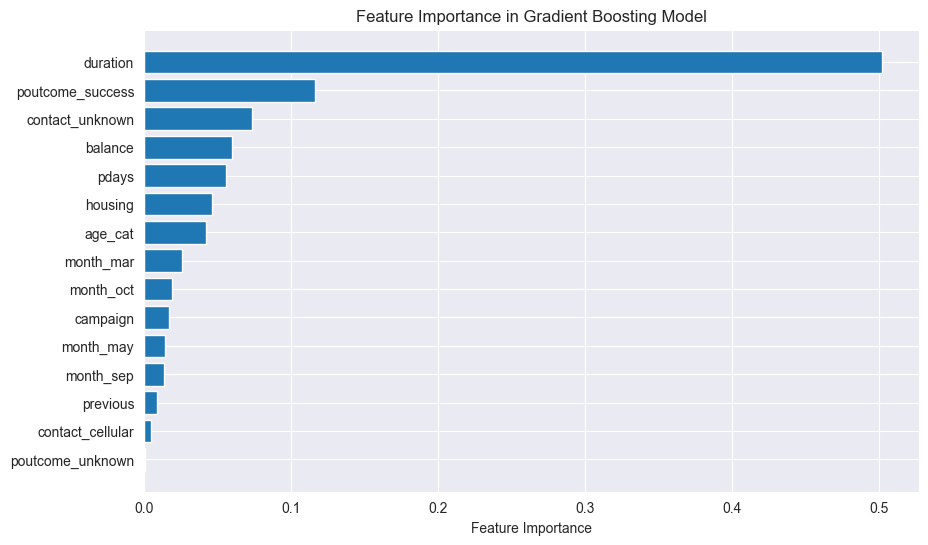

In [123]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
# Получаем важность признаков
feature_importances = gb_model.feature_importances_

# Сортируем признаки по важности
sorted_importances = sorted(zip(selected_features, feature_importances), key=lambda x: x[1], reverse=False)

# Разделяем отсортированные признаки и их важности для построения графика
features, importances = zip(*sorted_importances)

# Создаем фигуру и ось для графика
plt.figure(figsize=(10, 6))

# Строим горизонтальную гистограмму для важности признаков
plt.barh(features, importances, align='center')

# Устанавливаем метки на оси X и Y
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Model')

# Показываем график
plt.show()

### Задания 6,7,8

In [125]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

In [127]:
import optuna
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2024-09-26 23:11:06,337] A new study created in memory with name: RandomForestClassifier
[I 2024-09-26 23:11:07,203] Trial 0 finished with value: 0.8587959343236904 and parameters: {'n_estimators': 182, 'max_depth': 25, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8587959343236904.
[I 2024-09-26 23:11:07,853] Trial 1 finished with value: 0.8524693299779805 and parameters: {'n_estimators': 143, 'max_depth': 10, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8587959343236904.
[I 2024-09-26 23:11:08,371] Trial 2 finished with value: 0.8488463349552661 and parameters: {'n_estimators': 115, 'max_depth': 26, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8587959343236904.
[I 2024-09-26 23:11:09,137] Trial 3 finished with value: 0.8582159624413146 and parameters: {'n_estimators': 170, 'max_depth': 28, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8587959343236904.
[I 2024-09-26 23:11:09,656] Trial 4 finished with value: 0.8834645669291339 and parameters: {'n_

In [128]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 137, 'max_depth': 17, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.91


In [129]:
# рассчитаем метрики для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train_scaled, y_train)

y_test_pred = model.predict(X_test_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('accuracy на тестовом наборе: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82
accuracy на тестовом наборе: 0.83


In [1]:
from sklearn.metrics import mean_squared_error
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]

# Расчет RMSE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {round(rmse, 2)}")

NameError: name 'np' is not defined